In [2]:
import numpy as np

seed = 12345512
np.random.seed(seed)

# dataset of 100 observations
n = 100
# returns num evenly spaced numbers over interval -5 to 5
x_data = np.linspace(-5, 5, num=n)
# add gaussian random noise to simulate real measurements
y_data = 10 + 5 * np.cos(3 * x_data + 2) + 1.5 * np.random.normal(size=n)

# randomly split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)



Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

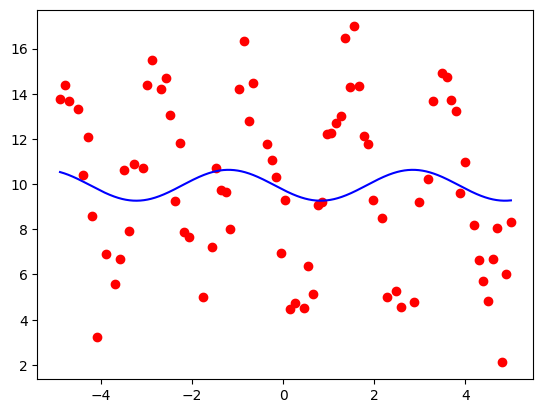

In [9]:
# Using optimize function of Scipy
from scipy import optimize
from IPython.display import display, Math
from matplotlib import pyplot as plt

def test_func(x, dist, amp, omega, phi):
    return dist + amp * np.cos(omega * x + phi)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[1, 1, 2, 1])

print('Fitted parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*params)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))

plt.plot(X_train, y_train, "ro")
x_fit = np.linspace(np.min(X_train), np.max(X_train), 1000)
y_fit = test_func(x_fit, *params)

plt.plot(x_fit, y_fit, "b")
plt.show()

In [12]:
# Using Hyperopt

def objective(a0, a1, w, f):
    """Objective function to minimize"""
    return np.mean((a0+ a1 * np.cos(w*X_train + f) - y_train)**2)

def objective2(args):
    return objective(*args)

from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math

space = [hp.uniform('a0', 5, 15),
        hp.uniform('a1', 0, 10),
        hp.uniform('w', 0, 10),
        hp.uniform('f', -np.pi, np.pi)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=500, rstate=np.random.seed(seed))
print('Fitted parameters:')
display(Math('a_0={a0:.2f}, a_1={a1:.2f}, \\omega={w:.2f}, \\phi={f:.2f}'.format(**tpe_best)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))


100%|██████| 500/500 [00:04<00:00, 105.93trial/s, best loss: 3.525831402049891]
Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

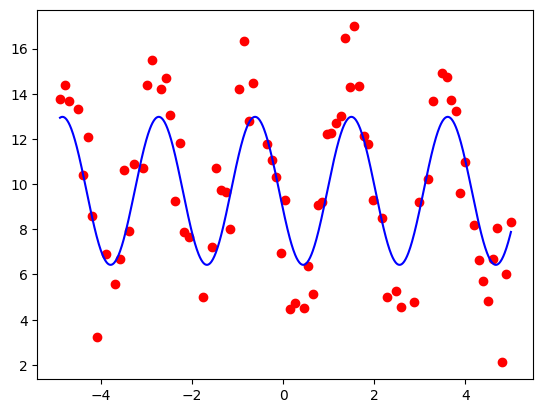

In [25]:
plt.plot(X_train, y_train, "ro")
y_fit = test_func(x_fit, tpe_best['a0'], tpe_best['a1'], tpe_best['w'], tpe_best['f'])

plt.plot(x_fit, y_fit, "b")
plt.show()

In [33]:
from HOBIT import RegressionForTrigonometric

trig_reg = RegressionForTrigonometric()
trig_reg.fit_cos(X_train, y_train, max_evals=500, rstate=np.random.seed(seed))

print('Fitted parameters:')
display(Math('a_0={intercept:.2f}, a_1={amplitude:.2f}, \\omega={omega:.2f}, \\phi={phi:.2f}'.format(**trig_reg.best_parameters)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))

100%|██████| 500/500 [00:02<00:00, 189.39trial/s, best loss: 5.958219204632222]
Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

ypred = trig_reg.predict(X_test)

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print('mse:', mse)
print('r2:', r2)

mse: 2.115416671528291
r2: 0.869260468523079


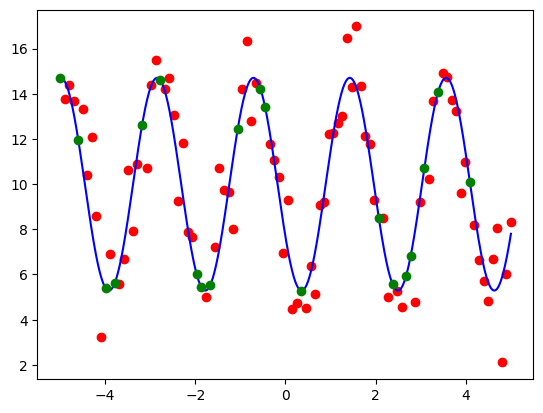

In [39]:
plt.plot(X_train, y_train, "ro")
y_fit = test_func(x_fit, trig_reg.best_parameters['intercept'], trig_reg.best_parameters['amplitude'], trig_reg.best_parameters['omega'], trig_reg.best_parameters['phi'])

plt.plot(x_fit, y_fit, "b")
plt.plot(X_test, ypred, "go")
plt.show()
